# Data Preprocessing

## 1. Reading & Understanding Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [2]:
train = pd.read_csv('training_set_features.csv')
train_labels=pd.read_csv('training_set_labels.csv')
test_set=pd.read_csv('test_set_features.csv')
train

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


## 2. Finding Missing Values

<Axes: >

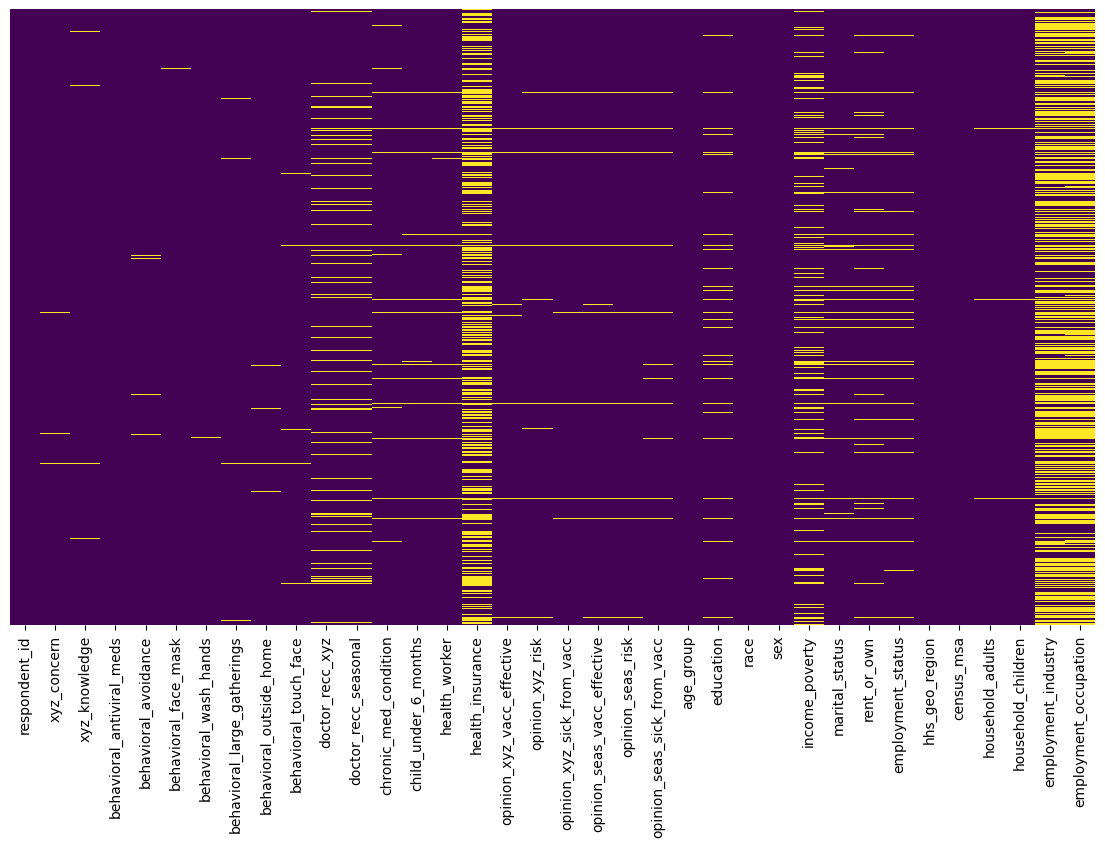

In [3]:
plt.figure(figsize=(14, 8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
train.shape

(26707, 36)

In [5]:
train.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

## 3. Outlier Analysis

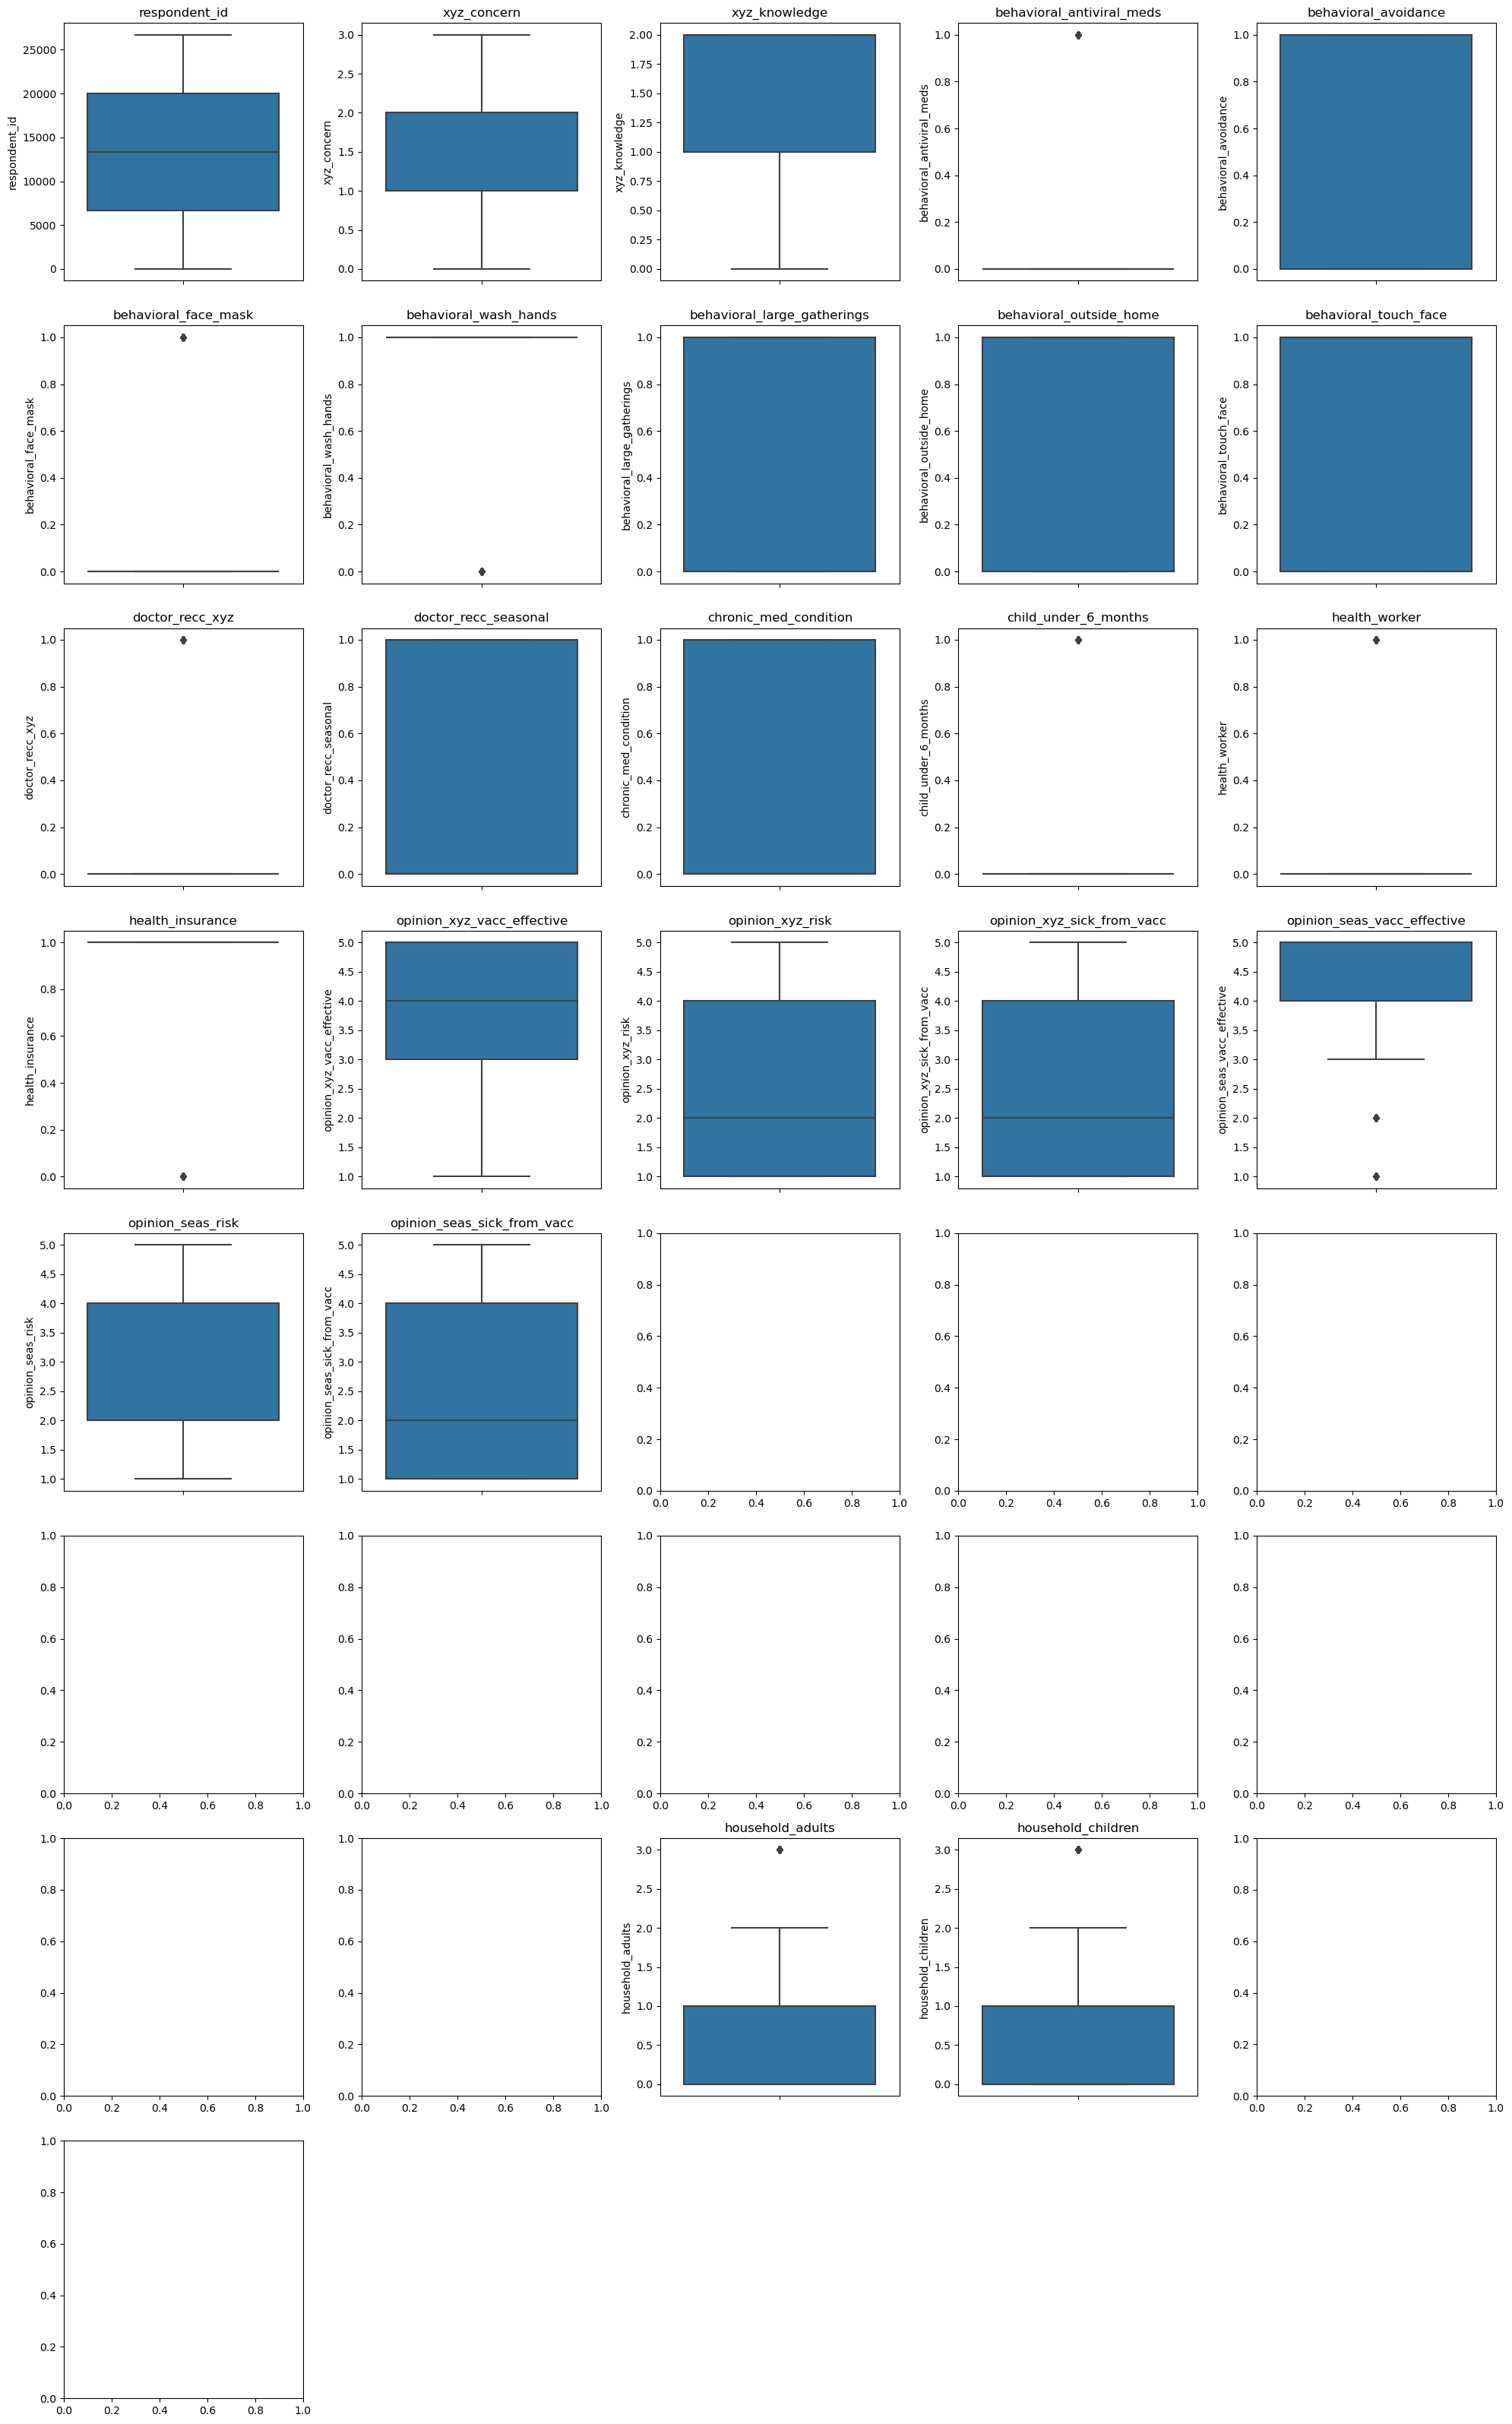

In [6]:
train = pd.read_csv('training_set_features.csv')

num_cols = len(train.columns)

num_rows = (num_cols + 4) // 5  
num_cols = 5

plt.figure(figsize=(num_cols * 4, num_rows * 4))

for i, column in enumerate(train.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    if train[column].dtype != 'object':  
        sns.boxplot(y=train[column])
        plt.title(column)
    else:
        print(f"Warning: Skipping column '{column}' as it is non-numeric.")

plt.tight_layout()
plt.show()

### <i> No need of removing outliers ***

## 4. Handling Missing Values & Encoding

In [7]:
def process(feat):
   
    columns_to_drop = ['health_insurance', 'employment_industry', 'employment_occupation']
    feat = feat.drop(columns=columns_to_drop)


    cat_cols = [col for col in feat.columns if feat[col].dtype == 'O']
    cont_cols = [col for col in feat.columns if col not in cat_cols]

    for col in cat_cols:
        feat[col] = LabelEncoder().fit_transform(feat[col])
    
    numerical_transformer = Pipeline(steps=[
        ('imputer', KNNImputer())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    transformer = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, cont_cols),
            ('cat', categorical_transformer, cat_cols)
        ])


    feat_processed = transformer.fit_transform(feat)
    processed_columns = cont_cols + cat_cols
    feat_processed = pd.DataFrame(feat_processed, columns=processed_columns)

    return feat_processed

train_feat_processed_df = process(train)

print(train_feat_processed_df.shape)

(26707, 33)


<Axes: >

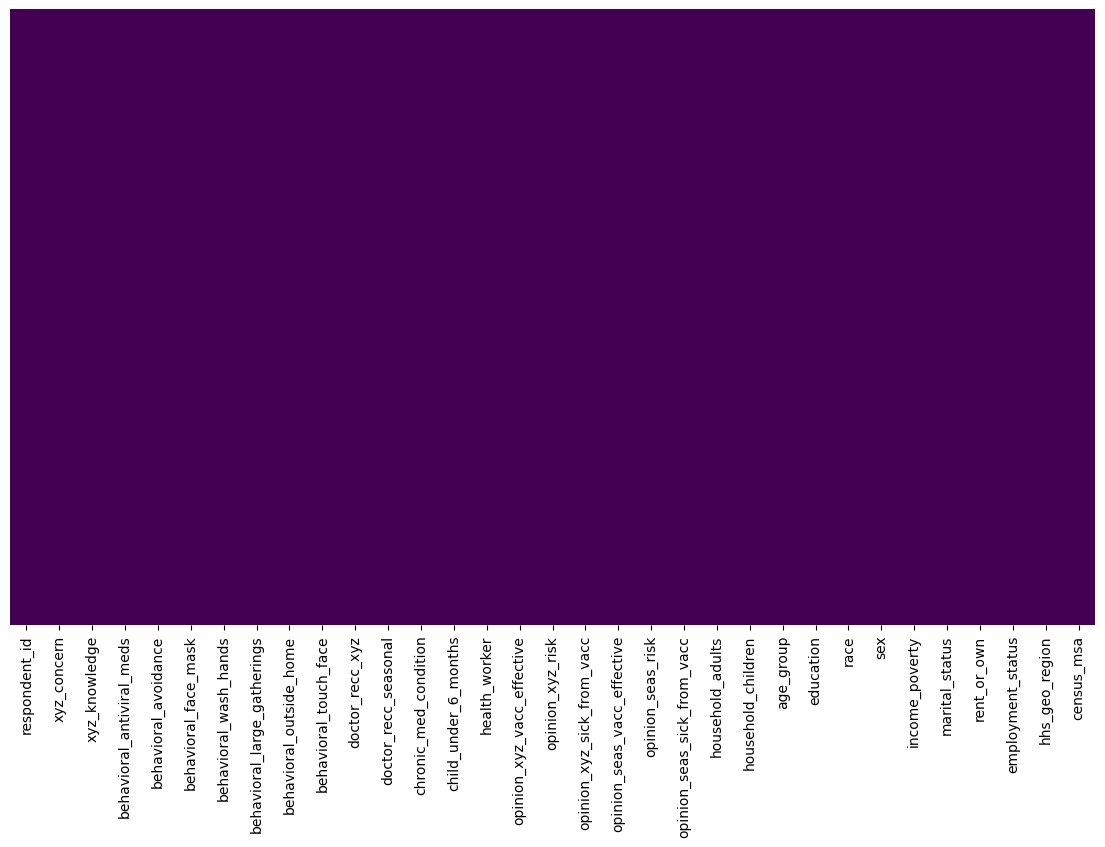

In [8]:
plt.figure(figsize=(14, 8))
sns.heatmap(train_feat_processed_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### <i> missing values replaced with data.

# 5. Training Machine Learning Model

In [9]:
X = train_feat_processed_df.iloc[:, 1:]
Y = train_labels[['xyz_vaccine', 'seasonal_vaccine']]
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, 
    test_size=0.2, 
    random_state=42
)

model_rfc = MultiOutputClassifier(RandomForestClassifier(random_state=42))
model_rfc.fit(X_train, y_train)

logreg = MultiOutputClassifier(LogisticRegression(max_iter=10000, random_state=42))
logreg.fit(X_train, y_train)

svm = MultiOutputClassifier(SVC(probability=True, random_state=42))
svm.fit(X_train,y_train)

MultiOutputClassifier(estimator=SVC(probability=True, random_state=42))

# 6. AUC ROC Scores of Various Models

In [10]:
submission_csv = pd.read_csv('submission_format.csv')

y_pred_logreg = logreg.predict_proba(X_test)
mean_roc_auc_logreg = (roc_auc_score(y_test['xyz_vaccine'], y_pred_logreg[0][:, 1]) +  roc_auc_score(y_test['seasonal_vaccine'], y_pred_logreg[1][:, 1])) / 2
print(f'Mean ROC AUC of LogReg: {mean_roc_auc_logreg}')

y_pred_rfc = model_rfc.predict_proba(X_test)
mean_roc_auc_rfc = (roc_auc_score(y_test['xyz_vaccine'], y_pred_rfc[0][:, 1]) +  roc_auc_score(y_test['seasonal_vaccine'], y_pred_rfc[1][:, 1])) / 2
print(f'Mean ROC AUC of RFC: {mean_roc_auc_rfc}')

y_pred_svm = svm.predict_proba(X_test)
mean_roc_auc_svm = (roc_auc_score(y_test['xyz_vaccine'], y_pred_svm[0][:, 1]) +  roc_auc_score(y_test['seasonal_vaccine'], y_pred_svm[1][:, 1])) / 2
print(f'Mean ROC AUC of SVM: {mean_roc_auc_svm}')


Mean ROC AUC of LogReg: 0.8371292364523618
Mean ROC AUC of RFC: 0.8410279780887653
Mean ROC AUC of SVM: 0.8310424417363809


# 7. Converting into Submission Format

In [11]:
test_feature_processed = process(test_set)
test = test_feature_processed.iloc[: , 1:] 
y_pred_rfc = svm.predict_proba(test) 

submission_csv['xyz_vaccine'] = y_pred_rfc[0][:, 1]  # Probabilities for 'xyz_vaccine'
submission_csv['seasonal_vaccine'] = y_pred_rfc[1][:, 1]  # Probabilities for 'seasonal_vaccine'

submission_csv.to_csv('Submission_file.csv', index=False) # Converting Pandas DataFrame to CSV File